In [6]:
import pandas as pd

# Carregar os eventos

In [7]:
events = pd.read_parquet('eventos_sem_generic.parquet')

In [8]:
events.head()

,event_id,event_type,period_id,timestamp,end_timestamp,ball_state,ball_owning_team,team_id,player_id,coordinates_x,...,receiver_player_id,body_part_type,set_piece_type,pass_type,result,success,duel_type,goalkeeper_type,card_type,match_id
index,,,,,,,,,,,,,,,,,,,,,
0,12926009,PASS,1,0 days 00:02:33.887000,NaT,alive,5,5,15620,0.503105,...,4696,RIGHT_FOOT,KICK_OFF,SIMPLE_PASS,COMPLETE,1.0,None,None,None,13335
2,12926647,PASS,1,0 days 00:02:36.623000,NaT,alive,5,5,4696,0.329743,...,14278,RIGHT_FOOT,None,None,INCOMPLETE,0.0,None,None,None,13335
3,12926642,DUEL,1,0 days 00:02:39.860000,NaT,alive,11,5,14278,0.760200,...,None,None,None,None,LOST,0.0,AERIAL,None,None,13335
4,12926642,DUEL,1,0 days 00:02:39.860000,NaT,alive,11,11,284,0.760200,...,None,None,None,None,WON,1.0,AERIAL,None,None,13335
5,12926642,DUEL,1,0 days 00:02:39.860000,NaT,alive,11,5,13068,0.760200,...,None,None,None,None,LOST,0.0,AERIAL,None,None,13335


In [9]:
events.columns

Index(['event_id', 'event_type', 'period_id', 'timestamp', 'end_timestamp',
       'ball_state', 'ball_owning_team', 'team_id', 'player_id',
       'coordinates_x', 'coordinates_y', 'end_coordinates_x',
       'end_coordinates_y', 'receiver_player_id', 'body_part_type',
       'set_piece_type', 'pass_type', 'result', 'success', 'duel_type',
       'goalkeeper_type', 'card_type', 'match_id'],
      dtype='object')

In [10]:
tracking = pd.read_parquet('13474/players.parquet')

In [11]:
match_13474 = (events['match_id'] == "13474")
events_13474 = events[match_13474]
events_13474

,event_id,event_type,period_id,timestamp,end_timestamp,ball_state,ball_owning_team,team_id,player_id,coordinates_x,...,receiver_player_id,body_part_type,set_piece_type,pass_type,result,success,duel_type,goalkeeper_type,card_type,match_id
index,,,,,,,,,,,,,,,,,,,,,
321163,15913737,PASS,1,0 days 00:01:39.466000,NaT,alive,7,7,5092,0.496524,...,2073,RIGHT_FOOT,KICK_OFF,SIMPLE_PASS,COMPLETE,1.0,None,None,None,13474
321165,15913740,PASS,1,0 days 00:01:42.302000,NaT,alive,7,7,2073,0.638895,...,5090,RIGHT_FOOT,None,SIMPLE_PASS,COMPLETE,1.0,None,None,None,13474
321167,15913741,PASS,1,0 days 00:01:45.506000,NaT,alive,7,7,5090,0.568486,...,None,RIGHT_FOOT,None,None,INCOMPLETE,0.0,None,None,None,13474
321168,15913742,PASS,1,0 days 00:01:47.541000,NaT,alive,19,19,2063,0.222210,...,None,HEAD,None,HEAD_PASS,COMPLETE,1.0,None,None,None,13474
321169,15913745,PASS,1,0 days 00:01:50.043000,NaT,alive,7,7,421,0.316686,...,581,LEFT_FOOT,None,SIMPLE_PASS,COMPLETE,1.0,None,None,None,13474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323637,15945284,DUEL,2,0 days 01:39:43.551000,NaT,alive,7,7,471,0.093610,...,None,None,None,None,WON,1.0,GROUND,None,None,13474
323638,15945284,DUEL,2,0 days 01:39:43.551000,NaT,alive,7,19,272,0.093610,...,None,None,None,None,LOST,0.0,GROUND,None,None,13474
323639,15945284,FOUL_COMMITTED,2,0 days 01:39:43.551000,NaT,dead,7,19,272,0.093610,...,None,None,None,None,None,NaN,None,None,None,13474


In [12]:
import pandas as pd

# filtro de tempo 
events_13474['timestamp'] = pd.to_timedelta(events_13474['timestamp'])
events_13474['seconds'] = events_13474['timestamp'].dt.total_seconds()
events_13474 = events_13474.sort_values('seconds')
tracking_df = tracking.sort_values('elapsed_seconds')

merged = pd.merge_asof(
    events_13474,
    tracking_df,
    left_on='seconds',
    right_on='elapsed_seconds',
    direction='nearest',  
    tolerance=0.1 
)


/var/folders/wq/1bmpq8zn7gz9pxrjbs5_1d9c0000gn/T/ipykernel_99562/2641009692.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_13474['timestamp'] = pd.to_timedelta(events_13474['timestamp'])
/var/folders/wq/1bmpq8zn7gz9pxrjbs5_1d9c0000gn/T/ipykernel_99562/2641009692.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_13474['seconds'] = events_13474['timestamp'].dt.total_seconds()


In [13]:
import pandas as pd

events_13474['timestamp'] = pd.to_timedelta(events_13474['timestamp'])
events_13474['seconds'] = events_13474['timestamp'].dt.total_seconds()
events_13474 = events_13474.sort_values('seconds')
tracking_df = tracking_df.sort_values('elapsed_seconds')

events_with_tracking = pd.merge_asof(
    events_13474,
    tracking_df,
    left_on='seconds',
    right_on='elapsed_seconds',
    direction='nearest', 
    tolerance=0.1  
)


In [18]:
events_with_tracking.head()


,event_id,event_type,period_id,timestamp,end_timestamp,ball_state,ball_owning_team,team_id,player_id,coordinates_x,...,ax,ay,speed,ball_vx_y,ball_vy_y,ball_vz_y,ball_speed_y,ball_ax_y,ball_ay_y,ball_az_y
0,15913737,PASS,1,0 days 00:01:39.466000,NaT,alive,7,7,5092,0.496524,...,-80.841473,-98.806245,4.259627,0.000000,0.0,0.000000,0.000000,-125.749634,134.731750,17.964233
1,15913740,PASS,1,0 days 00:01:42.302000,NaT,alive,7,7,2073,0.638895,...,82.632997,55.687455,3.324885,0.000000,0.0,0.000000,0.000000,-152.691408,-98.800323,0.000000
2,15913741,PASS,1,0 days 00:01:45.506000,NaT,alive,7,7,5090,0.568486,...,-116.764018,17.065510,3.937457,0.000000,0.0,0.000000,0.000000,592.819702,-161.678101,-44.910583
3,15913742,PASS,1,0 days 00:01:47.541000,NaT,alive,19,19,2063,0.222210,...,92.513029,0.000000,0.000000,-1.198789,0.0,8.691222,8.773507,-35.927390,0.000000,260.473578
4,15913745,PASS,1,0 days 00:01:50.043000,NaT,alive,7,7,421,0.316686,...,100.602722,-36.827782,3.574555,0.000000,0.0,0.000000,0.000000,26.946350,-26.946350,0.000000


In [15]:
import numpy as np

field_length = 105  # metros
field_width = 68

nx, ny = 100, 68
x = np.linspace(0, field_length, nx)
y = np.linspace(0, field_width, ny)
grid_x, grid_y = np.meshgrid(x, y)


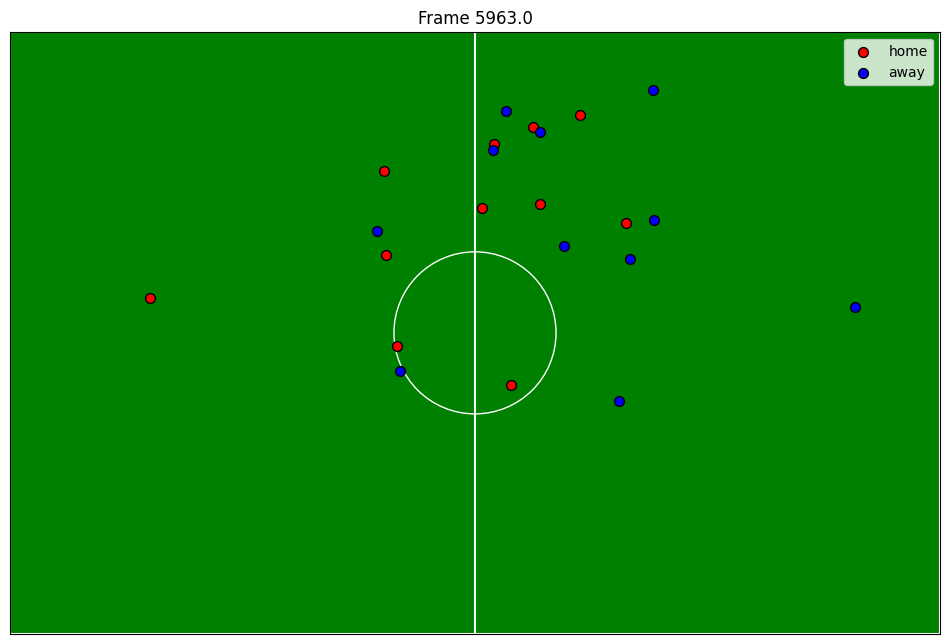

In [28]:
import matplotlib.pyplot as plt
import numpy as np

def setup_pitch(ax):
    ax.set_facecolor("green")
    ax.set_xlim(0, field_length)
    ax.set_ylim(0, field_width)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal') 
    ax.plot([field_length/2, field_length/2], [0, field_width], color='white')
    ax.plot([0, field_length], [0, 0], color='white') 
    ax.plot([0, field_length], [field_width, field_width], color='white')
    ax.plot([0, 0], [0, field_width], color='white') 
    ax.plot([field_length, field_length], [0, field_width], color='white')
    ax.add_patch(plt.Circle((field_length/2, field_width/2), 9.15, color='white', fill=False))

def plot_single_frame(tracking_df, frame_id):
    fig, ax = plt.subplots(figsize=(12, 8))
    setup_pitch(ax)

    data = tracking_df[tracking_df['frame_id'] == frame_id]

    home = data[data['team'] == 'home']
    away = data[data['team'] == 'away']

    home_x = home['x'] + field_length/2
    home_y = home['y'] + field_width/2
    away_x = away['x'] + field_length/2
    away_y = away['y'] + field_width/2

    ax.scatter(home_x, home_y, c='red', label='home', s=50, edgecolors='black') 
    ax.scatter(away_x, away_y, c='blue', label='away', s=50, edgecolors='black')

    ax.legend(loc='upper right')
    ax.set_title(f"Frame {frame_id}")

    plt.show()


evento = events_with_tracking.iloc[0]  
frame_id = evento['frame_id']
plot_single_frame(tracking_df, frame_id)



In [7]:
events['event_type'].value_counts()

event_type
PASS              386463
DUEL              103177
BALL_OUT           34905
CLEARANCE          16617
CARRY              14399
SHOT               10754
FOUL_COMMITTED     10146
TAKE_ON             9149
SUBSTITUTION        3024
CARD                1425
GOALKEEPER           873
PLAYER_OFF           446
PLAYER_ON            350
Name: count, dtype: int64

In [10]:
roubadas = (events['event_type'] == 'DUEL') & (events['success'] == True)

events_roubada = events[roubadas]